In [1]:
%cd /workspaces/Lidar-Occlusion

/workspaces/Lidar-Occlusion


/usr/local/python/3.12.3/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
#%matplotlib widget

In [3]:
import masks

In [4]:
from portion import IntervalDict

In [5]:
mask = masks.ProbLidarMask([((0, 1), 0.7), ((2, 3), 0.7)])

In [6]:
mask

ProbLidarMask(('array([0.7, 0.7, 0.7, ..., 0. , 0. , 0. ])', Fraction(1, 180)))

In [7]:
mask.map_bool(lambda x: x < 0.5).int_dict

{[Fraction(0, 1),Fraction(181, 180)) | [Fraction(2, 1),Fraction(541, 180)): False, [Fraction(181, 180),Fraction(2, 1)) | [Fraction(541, 180),Fraction(377, 60)): True}

In [8]:
mask < 0.8

BoolLidarMask([], 1/180)

In [9]:
import math

In [10]:
ms = [
    masks.BoolLidarMask([(2*k*math.pi/12, (2*k+5)*math.pi/12)])
        for k in range(12)
]

In [11]:
ms

[BoolLidarMask([[Fraction(59, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(19, 36)), [Fraction(11, 6),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(21, 20)), [Fraction(85, 36),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 180)), [Fraction(173, 60),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(377, 180)), [Fraction(613, 180),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(118, 45)), [Fraction(707, 180),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 90)), [Fraction(401, 90),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(11, 3)), [Fraction(224, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(377, 90)), [Fraction(11, 2),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 60)), [Fraction(271, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(9

In [12]:
import matplotlib.pyplot as plt

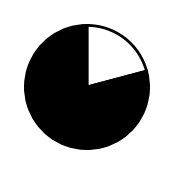

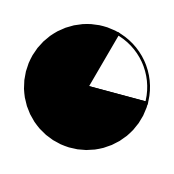

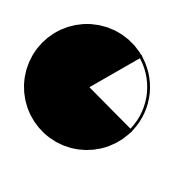

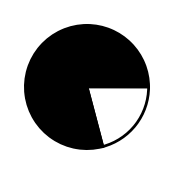

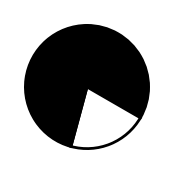

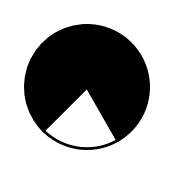

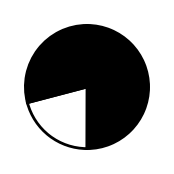

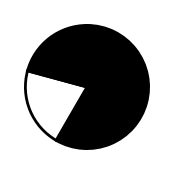

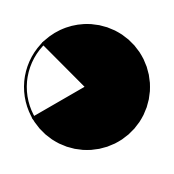

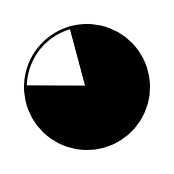

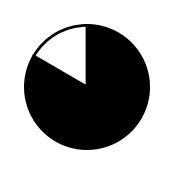

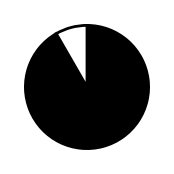

In [13]:
for m in ms:
    m.pie_plot()
    plt.show()

In [14]:
import itertools

In [15]:
list

list

In [16]:
list(itertools.islice(zip(
    itertools.count(),
    itertools.islice(itertools.count(), 1, None),
    itertools.islice(itertools.count(), 2, None)), 10))

[(0, 1, 2),
 (1, 2, 3),
 (2, 3, 4),
 (3, 4, 5),
 (4, 5, 6),
 (5, 6, 7),
 (6, 7, 8),
 (7, 8, 9),
 (8, 9, 10),
 (9, 10, 11)]

In [17]:
xs = zip(
    itertools.count(),
    itertools.islice(itertools.count(), 1, None),
    itertools.islice(itertools.count(), 2, None))

In [18]:
[float(x) for x in ms[0].angles]

[0.0,
 0.005555555555555556,
 0.011111111111111112,
 0.016666666666666666,
 0.022222222222222223,
 0.027777777777777776,
 0.03333333333333333,
 0.03888888888888889,
 0.044444444444444446,
 0.05,
 0.05555555555555555,
 0.06111111111111111,
 0.06666666666666667,
 0.07222222222222222,
 0.07777777777777778,
 0.08333333333333333,
 0.08888888888888889,
 0.09444444444444444,
 0.1,
 0.10555555555555556,
 0.1111111111111111,
 0.11666666666666667,
 0.12222222222222222,
 0.12777777777777777,
 0.13333333333333333,
 0.1388888888888889,
 0.14444444444444443,
 0.15,
 0.15555555555555556,
 0.16111111111111112,
 0.16666666666666666,
 0.17222222222222222,
 0.17777777777777778,
 0.18333333333333332,
 0.18888888888888888,
 0.19444444444444445,
 0.2,
 0.20555555555555555,
 0.2111111111111111,
 0.21666666666666667,
 0.2222222222222222,
 0.22777777777777777,
 0.23333333333333334,
 0.2388888888888889,
 0.24444444444444444,
 0.25,
 0.25555555555555554,
 0.2611111111111111,
 0.26666666666666666,
 0.272222222222

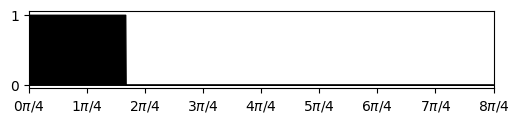

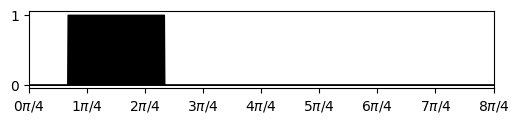

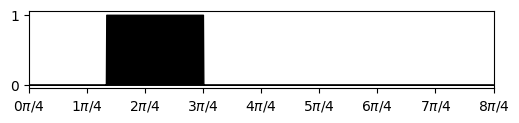

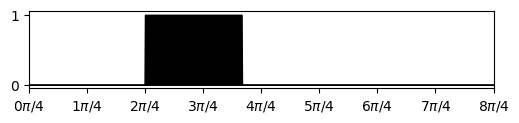

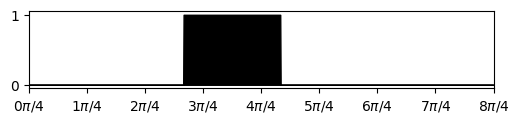

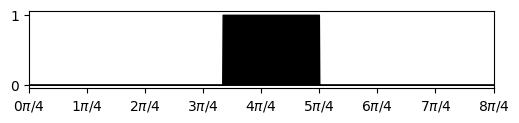

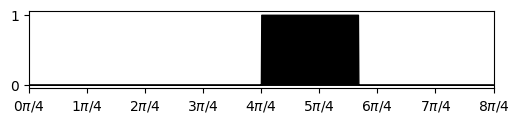

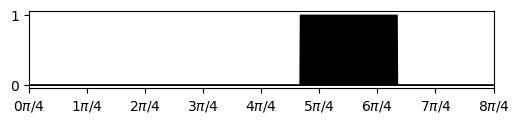

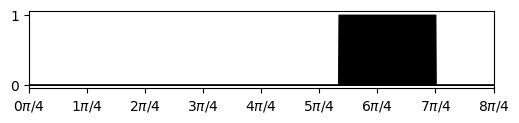

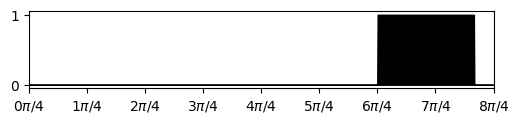

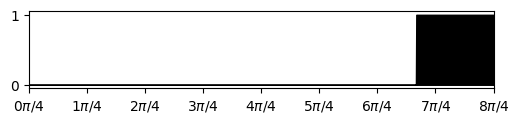

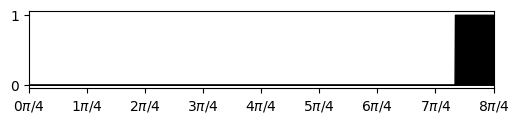

In [19]:
for m in ms:
    m.plot()
    plt.show()

In [20]:
from sliding_lidar_masks import sliding_lidar_mask, sliding_prob_lidar_mask

In [21]:
list(sliding_lidar_mask(ms, window_size=3, cutoff=0.9))

[BoolLidarMask([[Fraction(59, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(19, 36)), [Fraction(59, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(21, 20)), [Fraction(59, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 180)), [Fraction(11, 6),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(377, 180)), [Fraction(85, 36),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(118, 45)), [Fraction(173, 60),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 90)), [Fraction(613, 180),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(11, 3)), [Fraction(707, 180),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(377, 90)), [Fraction(401, 90),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(283, 60)), [Fraction(224, 45),Fraction(377, 60))], 1/180),
 BoolLidarMask([[Fraction(0, 1),Fraction(9

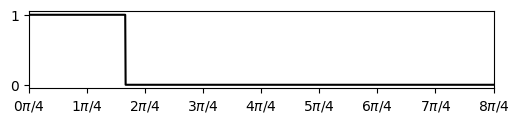

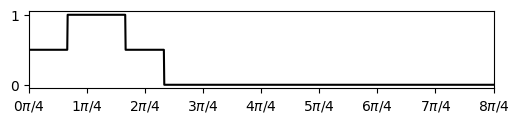

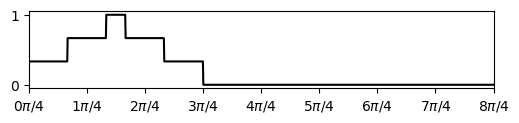

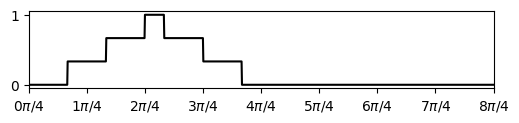

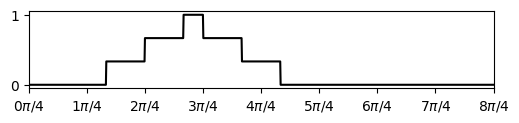

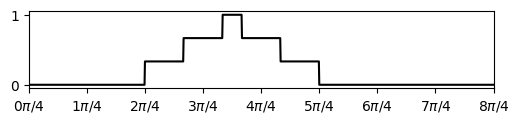

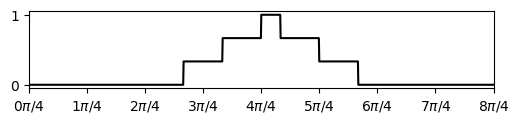

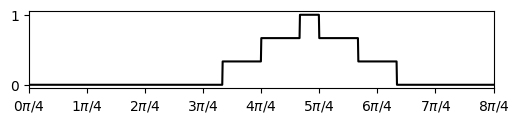

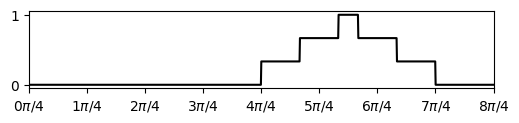

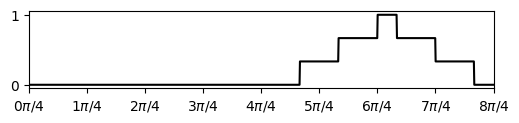

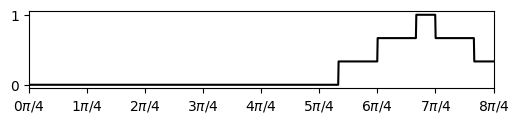

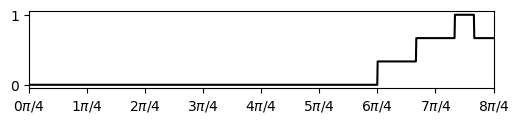

In [22]:
for p in sliding_prob_lidar_mask(ms, window_size=3):
    p.plot()
    plt.show()

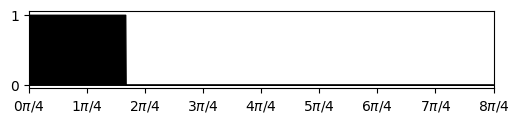

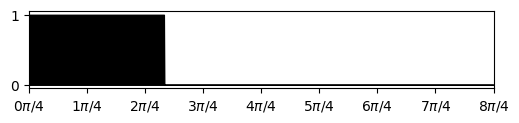

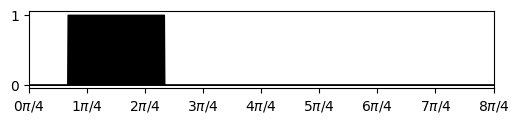

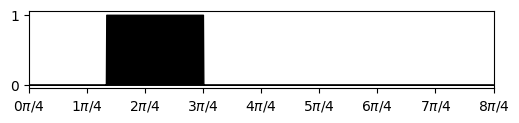

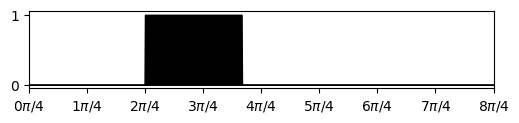

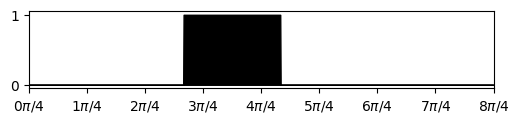

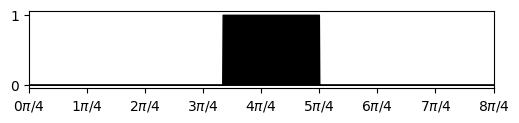

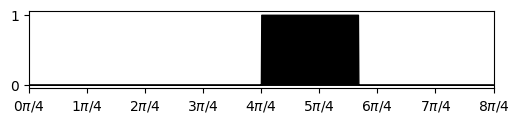

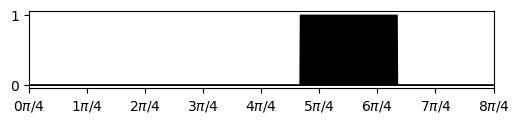

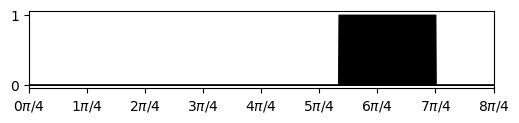

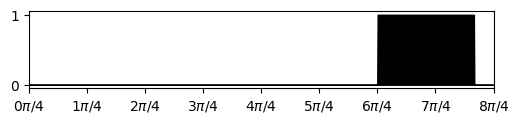

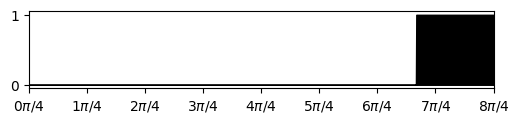

In [23]:
for m in sliding_lidar_mask(ms, window_size=3, cutoff=0.4):
    m.plot()
    plt.show()

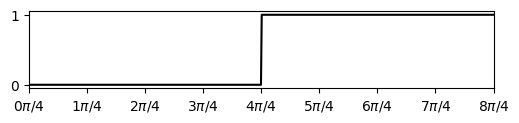

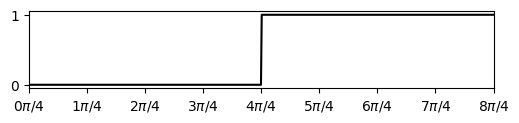

In [ ]:
a = masks.ProbLidarMask([((math.pi, 2*math.pi), 1.0)])
a.plot()

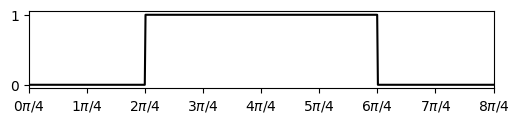

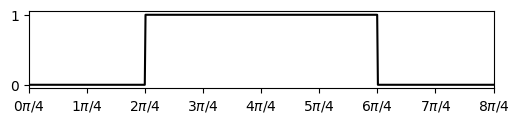

In [ ]:
b = masks.ProbLidarMask([((math.pi/2, (3/2)*math.pi), 1.0)])
b.plot()

In [ ]:
%timeit a + b

633 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


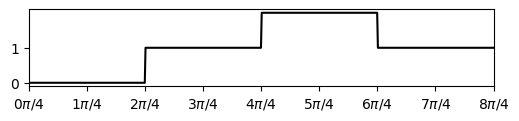

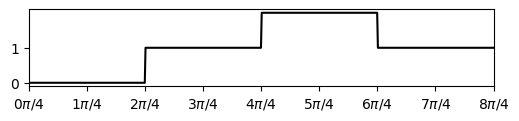

In [ ]:
(a + b).plot()

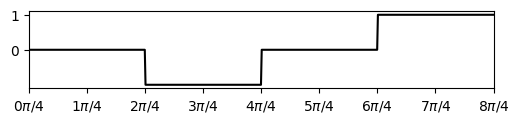

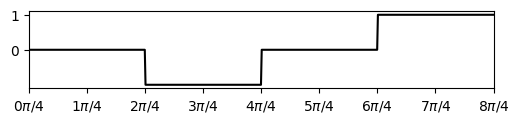

In [ ]:
(a + (-b)).plot()

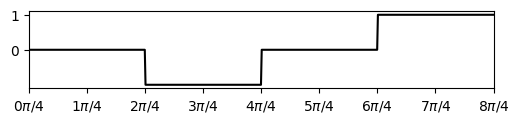

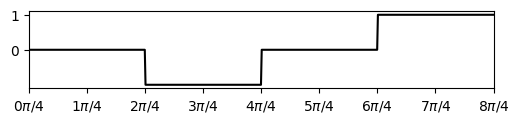

In [ ]:
(a - b).plot()

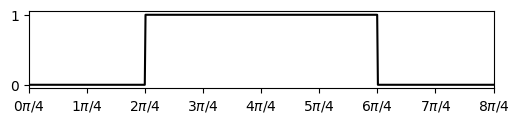

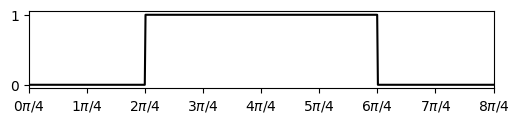

In [ ]:
(a + (b - a)).plot()

In [ ]:
a.completion

ProbLidarMask([([0,3.141592653589793), 0.0), ([3.141592653589793,6.283185307179586), 1.0)])

In [ ]:
b.completion

ProbLidarMask([([0,1.5707963267948966), 0.0), ((4.71238898038469,6.283185307179586), 0.0), ([1.5707963267948966,4.71238898038469], 1.0)])

In [ ]:
%time
ps = [
    masks.ProbLidarMask(m.map_poly(lambda _: 1.0))
        for m in ms
]
ps

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.25 µs


[ProbLidarMask([([0.0,1.3089969389957472], 1.0)]),
 ProbLidarMask([([0.5235987755982988,1.832595714594046], 1.0)]),
 ProbLidarMask([([1.0471975511965976,2.356194490192345], 1.0)]),
 ProbLidarMask([([1.5707963267948966,2.8797932657906435], 1.0)]),
 ProbLidarMask([([2.0943951023931953,3.4033920413889427], 1.0)]),
 ProbLidarMask([([2.6179938779914944,3.926990816987241], 1.0)]),
 ProbLidarMask([([3.141592653589793,4.4505895925855405], 1.0)]),
 ProbLidarMask([([3.665191429188092,4.974188368183839], 1.0)]),
 ProbLidarMask([([4.1887902047863905,5.497787143782138], 1.0)]),
 ProbLidarMask([([4.71238898038469,6.021385919380436], 1.0)]),
 ProbLidarMask([([5.235987755982989,6.283185307179586), 1.0)]),
 ProbLidarMask([([5.759586531581287,6.283185307179586), 1.0)])]

In [ ]:
ps[1] >= 0.9

BoolLidarMask([[0.5235987755982988,1.832595714594046]])

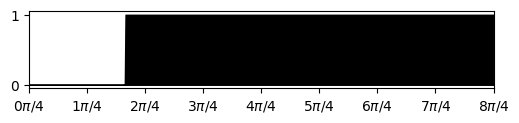

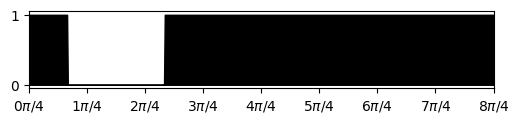

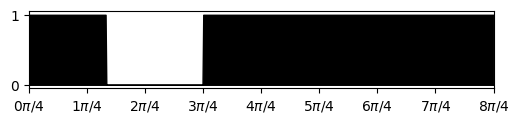

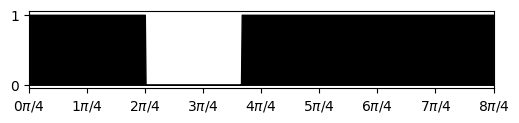

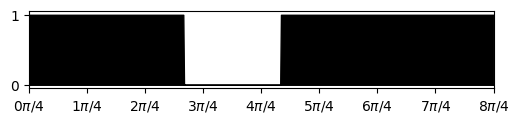

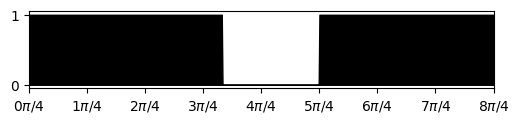

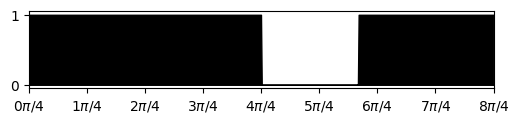

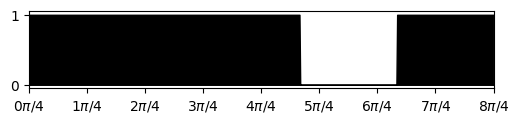

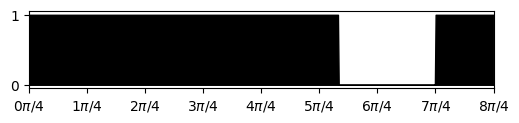

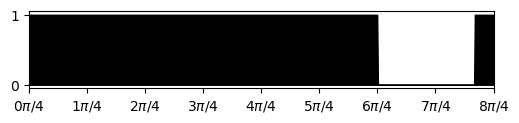

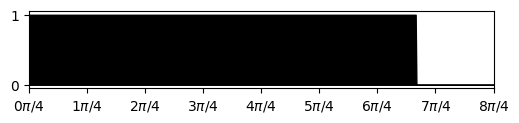

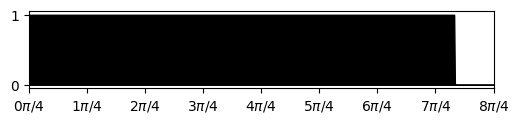

In [ ]:
for p in ps:
    (p >= 0.9).area_plot()
    plt.show()

In [ ]:
ps[1:4]

[ProbLidarMask([([0.5235987755982988,1.832595714594046], 1.0)]),
 ProbLidarMask([([1.0471975511965976,2.356194490192345], 1.0)]),
 ProbLidarMask([([1.5707963267948966,2.8797932657906435], 1.0)])]

In [ ]:
(1/3)*sum(ps[1:4], masks.ProbLidarMask.total_mask(0.0))

ProbLidarMask([([0,1.0471975511965976), 0.3333333333333333), ((2.356194490192345,6.283185307179586), 0.3333333333333333), ([1.0471975511965976,1.5707963267948966), 0.6666666666666666), ((1.832595714594046,2.356194490192345], 0.6666666666666666), ([1.5707963267948966,1.832595714594046], 1.0)])

In [ ]:
list(sliding_prob_lidar_mask(ms, window_size=3))[3]

ProbLidarMask([([0,0.5235987755982988), 0.25), ((2.356194490192345,6.283185307179586), 0.25), ([0.5235987755982988,1.0471975511965976), 0.5), ((1.3089969389957472,1.5707963267948966), 0.5), ((1.832595714594046,2.356194490192345], 0.5), ([1.0471975511965976,1.3089969389957472], 0.75), ([1.5707963267948966,1.832595714594046], 0.75)])

In [ ]:
list(sliding_prob_lidar_mask(ms, window_size=3))[3]

ProbLidarMask([([0,0.5235987755982988), 0.25), ((2.356194490192345,6.283185307179586), 0.25), ([0.5235987755982988,1.0471975511965976), 0.5), ((1.3089969389957472,1.5707963267948966), 0.5), ((1.832595714594046,2.356194490192345], 0.5), ([1.0471975511965976,1.3089969389957472], 0.75), ([1.5707963267948966,1.832595714594046], 0.75)])

In [ ]:
from functools import partial
import operator as op

In [ ]:
list(sliding_prob_lidar_mask(ms, window_size=3))[3].map_bool(partial(op.lt, 0.9))

BoolLidarMask([])

In [ ]:
list(sliding_lidar_mask(ms, window_size=3, cutoff=0.9))[3]

BoolLidarMask([])